<div style="text-align: center"> <h1>Stroke Model</h1></div>

This project will focus on building a stroke model. A stroke is when there is an abrupt disruption of blood flow to the brain. This is caused by blood vessel blockage, narrowing or bursting. According to the Nation Institutes of Health (NIH), nearly 800,000 Americans suffer a stroke every year, with some of these cases being fatal. If an individual survives a stroke, the neurological effects can be mild to severe, and may include cognitive decline, movement problems and emotional dysregulation. The NIH lists several risk factors for stroke, some of which are unmodifiable, and some can be modified. Building an accurate model of the risk factors involved in stroke could help craft guidelines for preventing strokes.


#### Stroke Background Information
U.S. Department of Health and Human Services. (2023, June 12). Stroke. National Institute of Neurological Disorders and Stroke. https://www.ninds.nih.gov/healthinformation/disorders/stroke 

#### Stroke Dataset
Fedesoriano. (2020). Stroke Prediction Dataset. Retrieved August 17, 2023 from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset.

#### GitHub Repository
https://github.com/grybkom/StrokeModel

## Import Packages

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pylab as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn


## Read in Data

In [14]:
# Import data
stroke = pd.read_csv("healthcare-dataset-stroke-data.csv")


## Initial Data Exploration

In [16]:
# Examine data
print(stroke.info())
stroke.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


The code below will print out which variables are numeric and which are categorical.

In [182]:
numerical_vars = []
categorical_vars = []

for column in stroke.columns:
    if pd.api.types.is_numeric_dtype(stroke[column]) and len(stroke[column].unique()) > 2:
        numerical_vars.append(column)
    else:
        categorical_vars.append(column)
        
print("Numerical variables:", numerical_vars)
print("Categorical variables:", categorical_vars)

Numerical variables: ['id', 'age', 'avg_glucose_level', 'bmi']
Categorical variables: ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']


### Explanation of Features

0. id: unique identifier
1. gender: "Male", "Female" or "Other"
2. age: individual's age
3. hypertension: 1 if the individual has hypertension 0 if not
4. heart_disease: 1 if the individual has heart disease 0 if not
5. ever_married: "No" or "Yes"
6. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
7. bmi: body mass index
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average blood glucose level 
10. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
11. stroke: 1 if the individual suffered a stroke and 0 if not


## Data Cleaning

I will first inspect the data for null values.

In [183]:
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
for c in stroke.columns:
    string_null = np.array([x in a[2:] for x in stroke[c]])
    print(c, stroke[c].isnull().sum(), string_null.sum()) 

id 0 0
gender 0 0
age 0 0
hypertension 0 0
heart_disease 0 0
ever_married 0 0
work_type 0 0
Residence_type 0 0
avg_glucose_level 0 0
bmi 201 0
smoking_status 0 0
stroke 0 0


The variable bmi appears to be the only one containing null values. I will impute the missing values with the mean. 

0


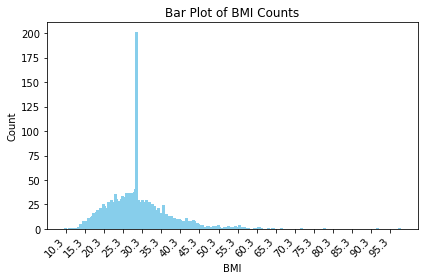

In [186]:
# Calculate mean of bmi
mean_bmi = stroke['bmi'].mean()
# Fill in missing bmi data with mean
stroke['bmi'].fillna(value=mean_bmi, inplace=True)
# Check for null values
print(stroke["bmi"].isnull().sum())

bmi_counts = stroke['bmi'].value_counts().sort_index()
plt.bar(bmi_counts.index, bmi_counts.values, color='skyblue')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Bar Plot of BMI Counts')
plt.xticks(rotation=45, ha="right")
plt.xticks(np.arange(min(bmi_counts.index), max(bmi_counts.index)+1, 5))

plt.tight_layout()
plt.show()

IImputing the variable bmi has cause a large clump of data at the mean. Therefor I will instead remove these entries.

In [19]:
stroke = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke = stroke.dropna()
stroke.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

I will also inspect the categorical variables for unusual entries. 

In [188]:
print(stroke['gender'].unique())
print(stroke['ever_married'].unique())
print(stroke['work_type'].unique())
print(stroke['smoking_status'].unique())
print(stroke['Residence_type'].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
['Urban' 'Rural']


There variable gender has male, female and other. I will examine gender more closely. 

         id gender   age  hypertension  heart_disease ever_married work_type  \
3116  56156  Other  26.0             0              0           No   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
3116          Rural             143.33  22.4  formerly smoked       0  


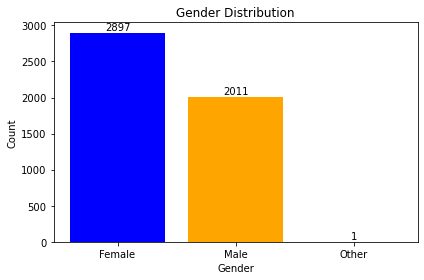

In [189]:
print(stroke[stroke['gender']=='Other'])

# bar plot of gender counts
gender_counts = stroke['gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'orange', 'green'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.xticks(rotation=0)

# add count numbers above the bars
for i, count in enumerate(gender_counts.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('Gender Distribution.png', dpi = 300, bbox_inches = 'tight')
plt.show()

There is only one instance of other in the category gender, so I will drop that data. 

In [21]:
# drop data
stroke.drop(stroke[stroke['gender']=="Other"].index,inplace=True)
# Check categories of gender variable 
stroke['gender'].value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

The variable smoking_status has a category Unknown, which I will now look at.

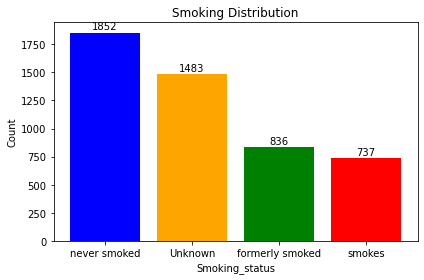

In [191]:
# bar plot of smoking_status counts
smoking_counts = stroke['smoking_status'].value_counts()
plt.bar(smoking_counts.index, smoking_counts.values, color=['blue', 'orange', 'green','red'])
plt.xlabel('Smoking_status')
plt.ylabel('Count')
plt.title('Smoking Distribution')
plt.xticks(rotation=0)

# add count numbers above the bars
for i, count in enumerate(smoking_counts.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('Smoking Distribution.png', dpi = 300, bbox_inches = 'tight')
plt.show()

Below I have also dropped the category id. It is a unique identifier for each individual and does not have any statistical meaning.

In [23]:
stroke = stroke.drop(columns = 'id')
stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.1+ KB


The Unknown category in the variable smoking_status has many entries, so I will not impute or drop any data based on this.

## Further Data Exploration
For this project stroke will be the response variable. This is a binary variable with 0 indicating a stroke has occured and 1 indicating no stroke has occured. In approximately 4.3 percent of the individuals a stroke has occurred and in approximately 95.7 percent of the individuals there was no indication of a stroke. 

Stroke Count: 209
No Stroke Count: 4699
0    95.741646
1     4.258354
Name: stroke, dtype: float64


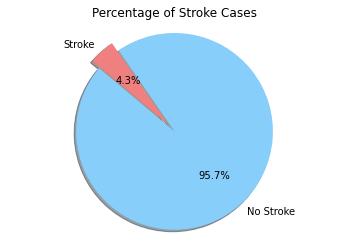

In [193]:
# Calculate the counts for stroke and no stroke
stroke_counts = stroke['stroke'].value_counts()
stroke_count = stroke_counts[1]
no_stroke_count = stroke_counts[0]

print(f"Stroke Count: {stroke_count}")
print(f"No Stroke Count: {no_stroke_count}")
print(stroke['stroke'].value_counts(normalize=True)*100)

# Calculate the percentage of stroke cases
stroke_percentage = (stroke['stroke'].value_counts(normalize=True) * 100).round(2)

# Create a pie chart
labels = ['No Stroke', 'Stroke']
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0) 
plt.pie(stroke_percentage, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Stroke Cases')
plt.axis('equal')  
plt.savefig('Stroke Percentage.png', dpi = 300, bbox_inches = 'tight')
plt.show()


### Exploration of Continuous Varaibles

#### Age

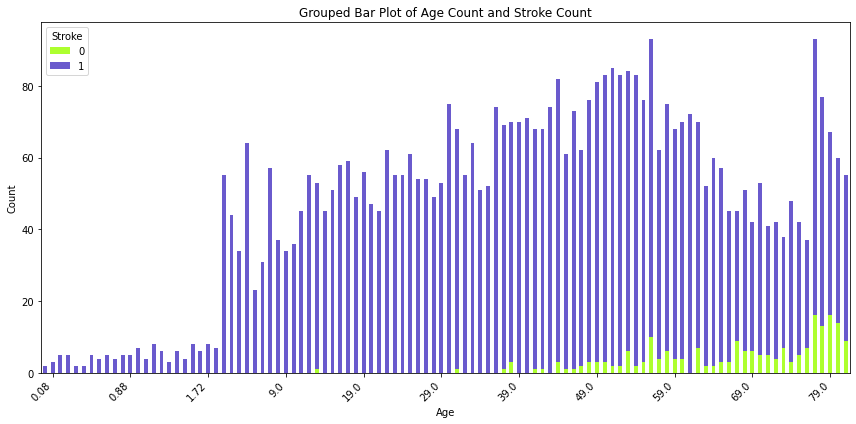

In [194]:
# Group the data by age and stroke, then calculate counts
age_stroke_counts = stroke.groupby(['age', 'stroke']).size().unstack()

# Swap the order of the columns for better visualization 
age_stroke_counts[[0, 1]] = age_stroke_counts[[1, 0]]

# Plot the grouped bar plot 
age_stroke_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['greenyellow', 'slateblue'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Grouped Bar Plot of Age Count and Stroke Count')
plt.legend(title='Stroke')
# Adjust x-axis tick positions and labels
plt.xticks(range(1, len(age_stroke_counts), 10), age_stroke_counts.index[::10], rotation=45, ha="right")

plt.tight_layout()
plt.savefig('Age and Stroke Distribution.png', dpi = 300, bbox_inches = 'tight')
plt.show()

### BMI

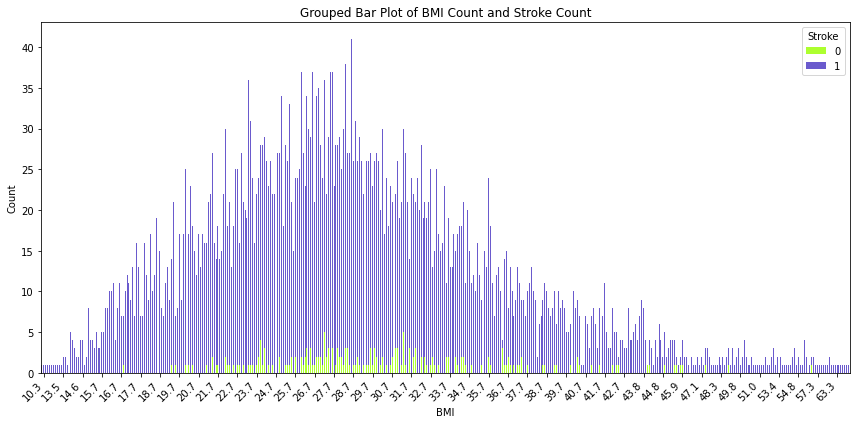

In [197]:
# Group the data by bmi and stroke, then calculate counts
bmi_stroke_counts = stroke.groupby(['bmi', 'stroke']).size().unstack()

# Swap the order of the columns for better visualization 
bmi_stroke_counts[[0, 1]] = bmi_stroke_counts[[1, 0]]

# Plot the grouped bar plot 
bmi_stroke_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['greenyellow', 'slateblue'])
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Grouped Bar Plot of BMI Count and Stroke Count')
plt.legend(title='Stroke')
# Adjust x-axis tick positions and labels
plt.xticks(range(1, len(bmi_stroke_counts), 10), bmi_stroke_counts.index[::10], rotation=45, ha="right")

plt.tight_layout()
plt.savefig('BMI and Stroke Distribution.png', dpi = 300, bbox_inches = 'tight')
plt.show()

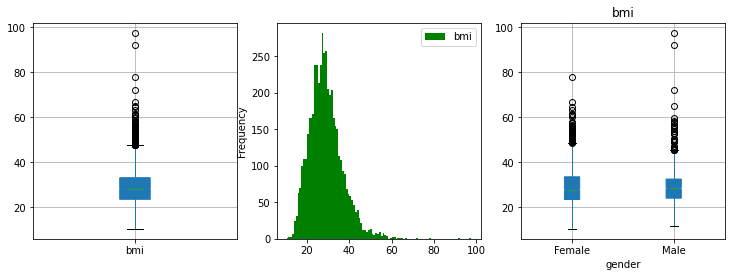

In [198]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
stroke.boxplot(column=['bmi'],patch_artist=True, notch=True, ax=axes[0])
plt.title('BMI Boxplot')

stroke.plot(kind="hist", y="bmi", bins=100, color="green", ax=axes[1])

stroke.boxplot(column=['bmi'],patch_artist=True, by='gender', notch=True, ax=axes[2])
plt.suptitle('')
plt.savefig('Body Mass Index.png', dpi = 300, bbox_inches = 'tight')
plt.show()

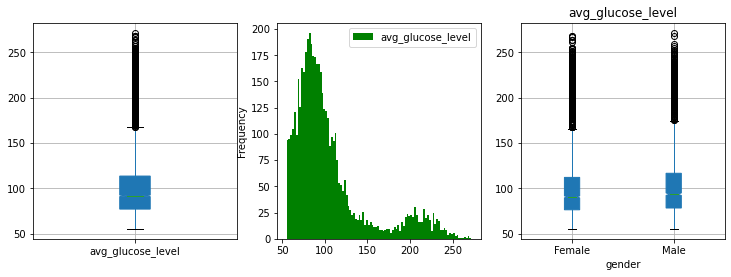

In [199]:
ig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
stroke.boxplot(column=['avg_glucose_level'], patch_artist=True, notch=True, ax=axes[0])
plt.title('Glucose Level Boxplot')

stroke.plot(kind="hist", y="avg_glucose_level", bins=100, color="green", ax=axes[1])

stroke.boxplot(column=['avg_glucose_level'], patch_artist=True, by='gender', notch=True, ax=axes[2])
plt.suptitle('')
plt.savefig('Average Glucose Level.png', dpi = 300, bbox_inches = 'tight')
plt.show()


The bmi and the ave_glucouse_level categories are right shifted with some outlying data points. The ave_glucouse_level category has an almost bimodal distribution. I have no reason to believe this there is something wrong with the data. These trends probably represent the natural variability in the population. Therefore, I will not alter these variables. 

### Exploration of Categorical Variables

Below is a function that will normalize the categorical variable and plot the percentage of each category that has and has not experienced a stroke. This will help identify variables that may have an increased association with stroke.

In [77]:
# Define a function to create a bar plot with percentages on bars
def plot_percentage_bar(data, x_col, y_col, xlabel, ylabel, title):
    grouped = data.groupby(x_col)[y_col].value_counts(normalize=True).unstack().fillna(0)
    ax = grouped.plot(kind='bar', stacked=True)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
    for container in ax.containers:
        for p in container.patches:
            total = p.get_height()
            if p.get_y() < 0:  # If the bar is for 'stroke' category
                ax.annotate(f'{total*100:.1f}%', 
                            (p.get_x() + p.get_width() / 2., p.get_y() + total), 
                            ha='center', va='bottom', fontsize=10, color='black')
            else:  # If the bar is for 'no stroke' category
                ax.annotate(f'{total*100:.1f}%', 
                            (p.get_x() + p.get_width() / 2., p.get_y()), 
                            ha='center', va='bottom', fontsize=10, color='black')

    plt.xticks(rotation=0)
    plt.legend(title=y_col)
    plt.tight_layout()
    plt.savefig('Stroke Percentage by Category.png', dpi = 300, bbox_inches = 'tight')
    plt.show()


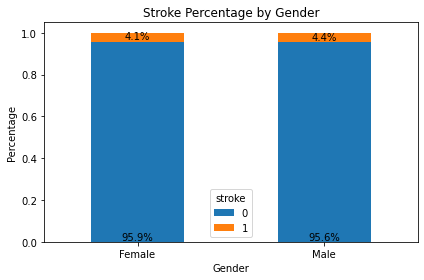

In [204]:
# Gender and Stroke Percentage
plot_percentage_bar(stroke, 'gender', 'stroke', 'Gender', 'Percentage', 'Stroke Percentage by Gender')


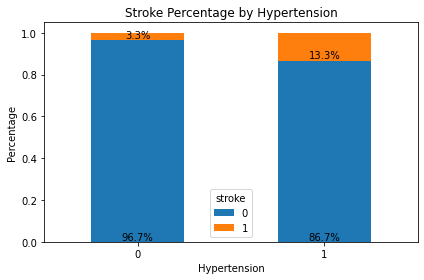

In [208]:
# Hypertension and Stroke Percentage
plot_percentage_bar(stroke, 'hypertension', 'stroke', 'Hypertension', 'Percentage', 'Stroke Percentage by Hypertension')

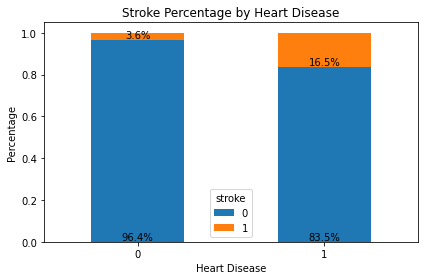

In [206]:
# Heart Disease and Stroke Percentage
plot_percentage_bar(stroke, 'heart_disease', 'stroke', 'Heart Disease', 'Percentage', 'Stroke Percentage by Heart Disease')

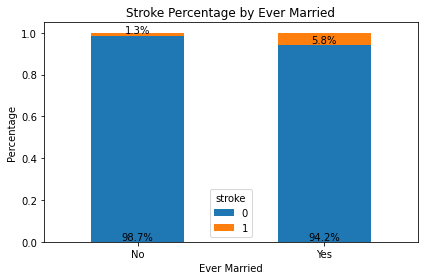

In [221]:
# Ever Married and Stroke Percentage
plot_percentage_bar(stroke, 'ever_married', 'stroke', 'Ever Married', 'Percentage', 'Stroke Percentage by Ever Married')

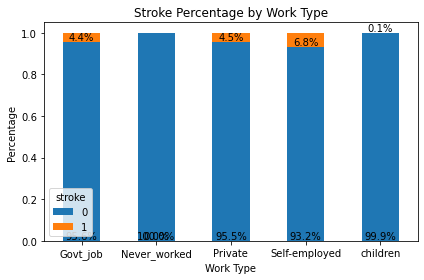

In [211]:
# Work Type and Stroke Percentage
plot_percentage_bar(stroke, 'work_type', 'stroke', 'Work Type', 'Percentage', 'Stroke Percentage by Work Type')

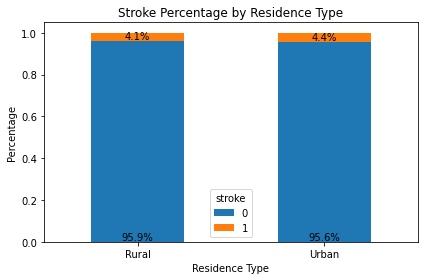

In [222]:
# Residence Type and Stroke Percentage
plot_percentage_bar(stroke, 'Residence_type', 'stroke', 'Residence Type', 'Percentage', 'Stroke Percentage by Residence Type')

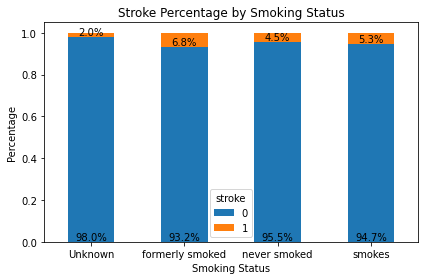

In [213]:
# Smoking Status and Stroke Percentage
plot_percentage_bar(stroke, 'smoking_status', 'stroke', 'Smoking Status', 'Percentage', 'Stroke Percentage by Smoking Status')


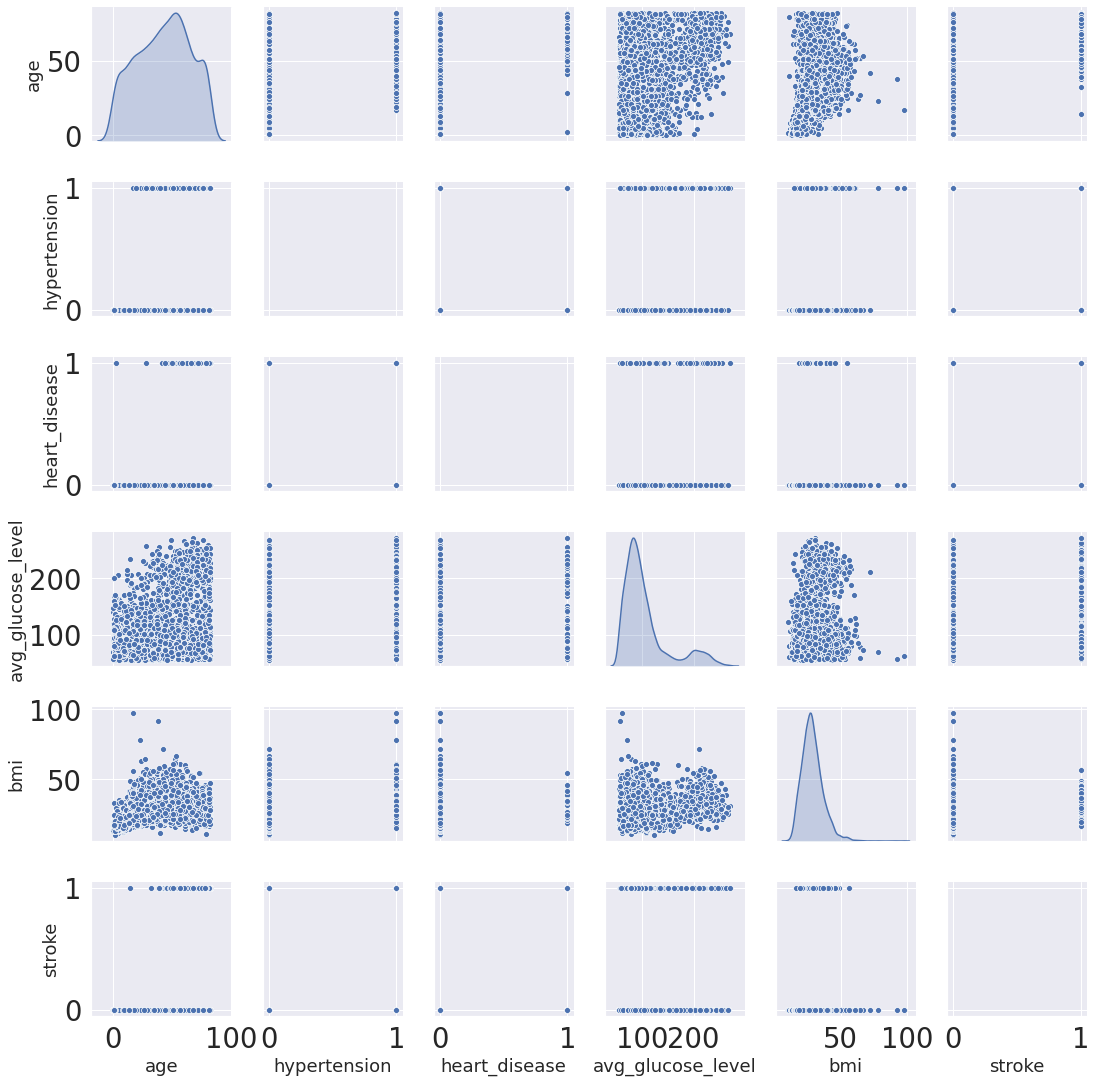

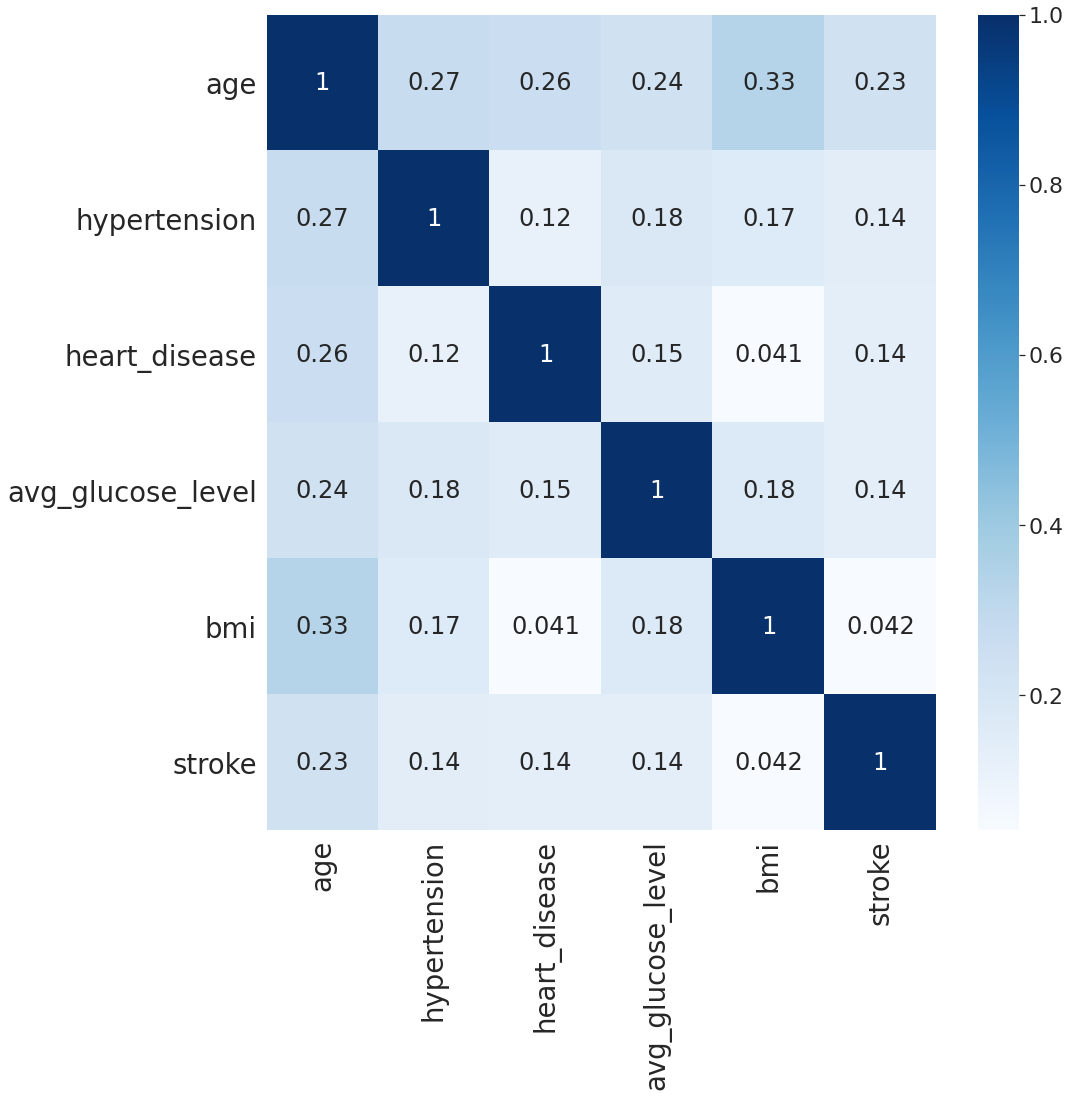

In [229]:
# paired plot
with sns.plotting_context(rc={"axes.labelsize":18}):
    sns.pairplot(stroke, diag_kind='kde', corner = False)
plt.savefig('Pair Plot.png', dpi = 300, bbox_inches = 'tight')
plt.show()

# correlation matrix plot
corr_matrix = stroke.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.set(font_scale=2)
sns.heatmap(corr_matrix, cmap="Blues", annot=True)
plt.savefig('Correlation Matrix.png', dpi = 300, bbox_inches = 'tight')
plt.show()

There not any strongly correlated variables. There is moderate correlation between bmi and age.

In [104]:
stroke_clean = stroke
stroke_clean.to_csv("stroke_clean.csv", index=False)

<div style="text-align: center"> <h1>Models</h1></div>

In [82]:
# Load test train split package
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = stroke.drop('stroke', axis=1)  # Features
y = stroke['stroke']               # Target variable

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

## Logistical Regression Model
Logistical regression is a good choice for this data set because the dependent variable, stroke, is binary, 1 if the individual suffered a stroke and 0 if not. The logistical regression model predicts the probability of Y = 1 given f(X). I will also employ recursive feature elimination to select the best performing features for the model.

In [85]:
# Load necessary packages
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [217]:
# Create a logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Initialize RFE
rfe = RFE(logreg, n_features_to_select=6)  # adjust the number of features to select

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

# Fit the logistic regression model with the selected features
logreg.fit(X_train[selected_features], y_train)

# Predict on the test data
y_pred_lr = logreg.predict(X_test[selected_features])

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)


Selected Features: Index(['hypertension', 'heart_disease', 'ever_married_Yes',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children'],
      dtype='object')
Accuracy: 0.9568052159739201


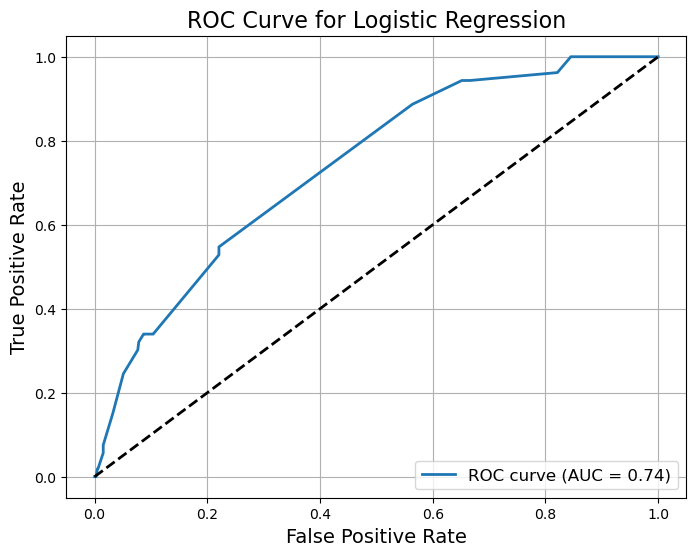

In [169]:
# Make predictions on test data
ypp = rfe.predict_proba(X_test)[:, 1]

# calculate the ROC curve
fpr, tpr, th = roc_curve(y_test, ypp)

# calculate the AUC
auc = roc_auc_score(y_test, ypp)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve for Logistic Regression', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.savefig('ROC curve Regression 6.png', dpi = 150, bbox_inches = 'tight')
plt.show()

### K-Nearest Neighbors Model
K-Nearest Neighbors (KNN) is another good model to used when the dependent variable is binary. KNN uses a classification algorithm to make predictions and is well suited for this type of data. 


In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

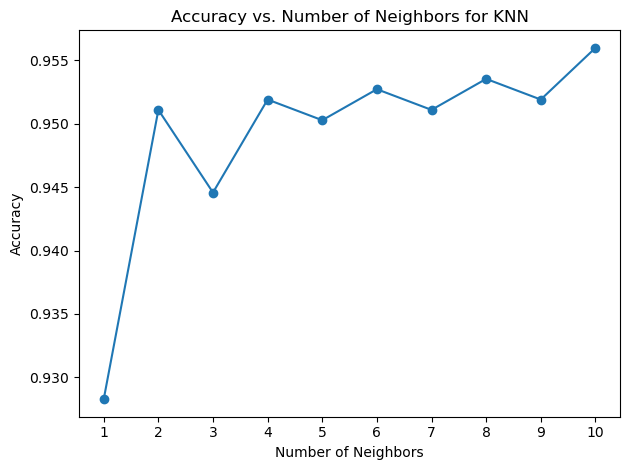

[0.928280358598207, 0.9511002444987775, 0.9445802770986145, 0.9519152404237978, 0.9502852485737572, 0.9527302363488183, 0.9511002444987775, 0.9535452322738386, 0.9519152404237978, 0.9559902200488998]


In [100]:
# Initialize lists to store accuracy values
accuracies = []

# Iterate over the number of neighbors from 1 to 10
for n_neighbors in range(1, 11):
    # Create a KNN model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store accuracy in the list
    accuracies.append(accuracy)

# Create a plot of accuracy vs. number of neighbors
plt.plot(range(1, 11), accuracies, marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors for KNN')
plt.xticks(range(1, 11))
plt.tight_layout()
plt.savefig('Accuracy KNN 6.png', dpi = 150, bbox_inches = 'tight')
plt.show()

print(accuracies)

In [114]:
best_accuracy_knn = accuracies[1]
print(best_accuracy_knn)

0.9511002444987775


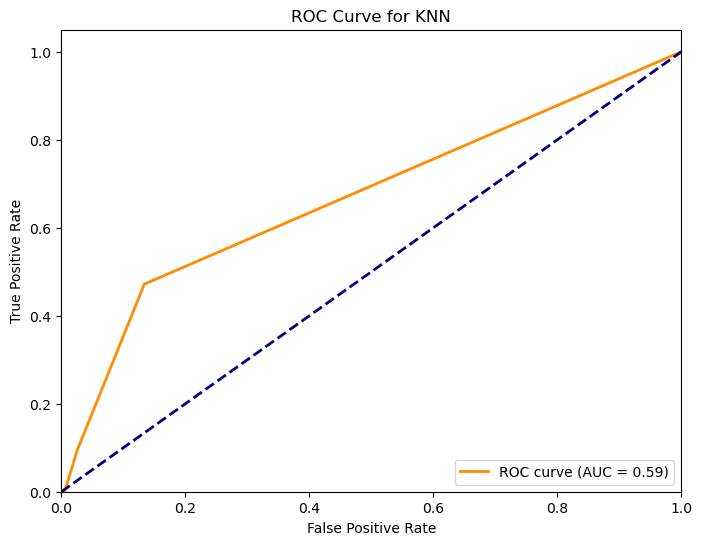

In [194]:
# Create a KNN model
knn_model = KNeighborsClassifier(n_neighbors=4)  # 2 neighbors

# Fit the model
knn_model.fit(X_train, y_train)

# Predict the probability scores for the positive class
y_scores = knn_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc="lower right")
plt.savefig('ROC curve KNN.png', dpi = 150, bbox_inches = 'tight')
plt.show()

### Support Vector Machine Model
Next I will build is a support vector machine (SVM). These models classify data by calculating the best hyperplane that separates one class of data from another. Therefore, an SVM should perform well with the stroke dataset. 

In [108]:
from sklearn.svm import SVC

Accuracy: 0.9568052159739201


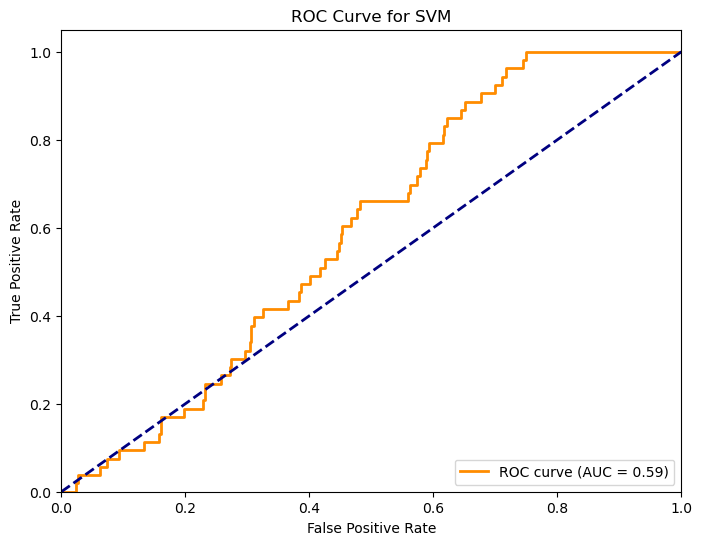

In [215]:
# Create an SVM model
svm = SVC(probability=True, random_state=42)  # Setting probability=True for ROC curve

# Fit the model
svm.fit(X_train, y_train)

# Predict probabilities on the test data
y_pred_prob = svm.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Calculate AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Predict on the test data
y_pred_svm = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc="lower right")
plt.savefig('ROC curve SVM.png', dpi = 150, bbox_inches = 'tight')
plt.show()

### Synthetic Minority Over-sampling Technique (SMOTE) with Random Forest
SMOTE is a technique used to model when there is class imbalance. Only 4.3% of the data is positive for stroke. SMOTE selects some datapoints and uses a distance measure to generate a new synthetic data point.

In [176]:
# packages for SMOTE
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

Accuracy: 0.9225753871230644


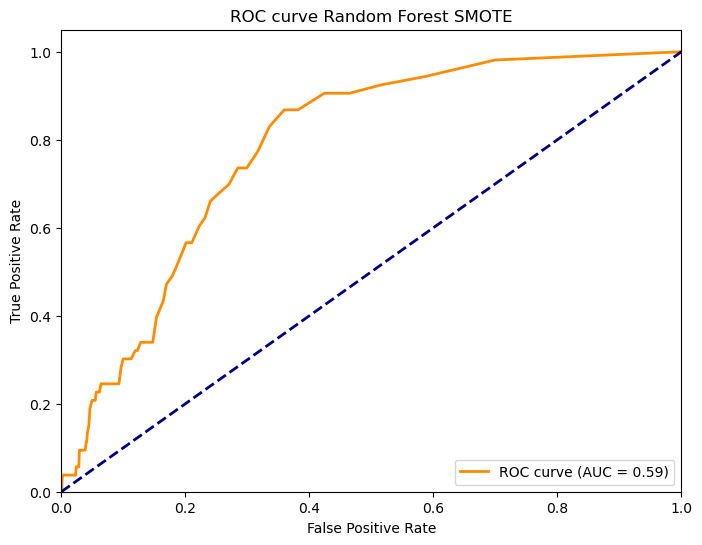

In [211]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on resampled data
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict the probability scores for the positive class
y_scores = rf_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Predict on the test data and calculate accuracy
y_pred_smote = rf_model.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print("Accuracy:", accuracy_smote)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve Random Forest SMOTE')
plt.legend(loc="lower right")
plt.savefig('ROC curve SMOTE.png', dpi = 150, bbox_inches = 'tight')
plt.show()

<div style="text-align: center"> <h1>Conclusions</h1></div>

All three models performed well on this problem. The SVM and logistical regression models achieved accuracies of almost 96 percent. The KNN model achieved an accuracy of just over 95 percent. I also plotted the ROC curves for each of these models. This is a measure of the true positive rate vs the false positive rate at different classification thresholds. The logistical regression model had the best AUC score of 0.74. Since the dataset was imbalanced, I built a model using SMOTE, which also achieved an accuracy score of approximately 92 percent. 

These models did well with a limited number of predictors. According to the NIH there are other important factors influencing stroke risk that were not in this dataset, such as drug use and cholesterol level. Finding a dataset with more relevant predictors could help in building a effective predictive model. 
